<a href="https://colab.research.google.com/github/LaloVilchis24/Data-Analyst-Projects/blob/main/Spotify_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Tracks Dataset

Este dataset contiene información de algunas canciones en spotify, sera usado para analizar algunos datos con un unico fin educativo

Link del dataset en Kaggle: https://www.kaggle.com/datasets/ambaliyagati/spotify-dataset-for-playing-around-with-sql

In [ ]:
# Frist we load the dataset
from google.colab import files
uploaded = files.upload()

Saving spotify_tracks.csv to spotify_tracks.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("spotify_tracks.csv")

In [ ]:
df.head() # Muestra las primeras filas de nuestro dataset

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [ ]:
df.info() # Aqui veremos información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


## Información del Dataset Spotify Tracks

Aqui podemos ver que tenemos 6300 entradas, es decir, 6300 filas en este caso canciones o tracks, además tenemos 8 columnas las cuales describimos a continuación:

| **Columna**   | **Tipo de dato** | **Significado**                                                            |
| ------------- | ---------------- | -------------------------------------------------------------------------- |
| `id`          | `object`         | ID único de cada canción (generalmente un código alfanumérico de Spotify). |
| `name`        | `object`         | Nombre o título de la canción.                                             |
| `genre`       | `object`         | Género musical al que pertenece la canción (pop, rock, rap, etc.).         |
| `artists`     | `object`         | Nombre(s) del/los artista(s) que interpretan la canción.                   |
| `album`       | `object`         | Nombre del álbum donde aparece la canción.                                 |
| `popularity`  | `int64`          | Puntuación de popularidad en Spotify (normalmente de 0 a 100).             |
| `duration_ms` | `int64`          | Duración de la canción en milisegundos.                                    |
| `explicit`    | `bool`           | Indica si la canción contiene lenguaje explícito (`True` o `False`).       |


In [ ]:
df.describe() # Muestra informacion de los valores de las columnas que contienen valores numericos

,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


## ¿Que nos dicen estos datos?

| Métrica           | ¿Qué significa?                                         | Interpretación |
| ----------------- | ------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **count**         | Cuántos datos hay sin estar vacíos.                     | Hay **6300 canciones** con valores válidos.                                                                 |
| **mean**          | El promedio de todos los valores.                       | La popularidad promedio es de **30.75** (moderada). La duración promedio es de **202,847 ms** (\~3:23 min). |
| **std**           | Qué tanto se alejan los valores del promedio.           | Alta desviación: hay **mucha variedad** en popularidad y duración.                                          |
| **min**           | El valor más bajo de la columna.                        | Hay canciones con **0 de popularidad** y con duración de solo **30 segundos**.                              |
| **25% (Q1)**      | El 25% de las canciones están por debajo de este valor. | El 25% menos popular tiene **menos de 16 puntos** y dura menos de **2:28 min**.                             |
| **50% (mediana)** | La mitad de los datos están por debajo.                 | La canción "típica" tiene **29 de popularidad** y dura **3:12 min**.                                        |
| **75% (Q3)**      | El 75% de los datos están por debajo.                   | Solo el 25% de canciones tiene más de **45 de popularidad** y duran más de **3:56 min**.                    |
| **max**           | El valor más alto.                                      | Hay canciones muy populares (**hasta 90**) y muy largas (**hasta 60 minutos**).                             |


# Preguntas de Analisis

1. ¿Cuál es la popularidad promedio de las canciones?

In [ ]:
promedio_pupularidad = df['popularity'].mean()
print(f'El promedio de popularidad es: {promedio_pupularidad}')

El promedio de popularidad es: 30.754761904761907


2. ¿Cuántas canciones tienen una popularidad mayor a 80?

In [ ]:
canciones_pupulares = df[df['popularity'] > 80]
num_canciones_pupulares = len(canciones_pupulares)
print(f'Hay {num_canciones_pupulares} con una popularidad mayor a 80')
canciones_pupulares.sort_values(by='popularity', ascending=False).head() # Muestra las canciones mas populares

Hay 24 con una popularidad mayor a 80


,id,name,genre,artists,album,popularity,duration_ms,explicit
1567,2HYFX63wP3otVIvopRS99Z,Houdini,edm,Eminem,Houdini,90,227239,True
5540,0zirWZTcXBBwGsevrsIpvT,Clean Baby Sleep White Noise (Loopable),sleep,"Dream Supplier, Baby Sleeps, Background White ...",Best White Noise For Sleeping Baby,88,142222,False
3158,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)",j-idol,"The Weeknd, JENNIE, Lily-Rose Depp",The Idol Episode 4 (Music from the HBO Origina...,87,244684,False
2797,4Dvkj6JhhA12EX05fT7y2e,As It Was,house,Harry Styles,Harry's House,87,167303,False
4746,7iabz12vAuVQYyekFIWJxD,BAND4BAND (feat. Lil Baby),r-n-b,"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),87,140733,True


3. ¿Cuál es la duración promedio de las canciones en minutos?

In [ ]:
promedio_duracion = df['duration_ms'].mean()
promedio_duracion_min = promedio_duracion / 60000
print(f'El promedio de duracion de las canciones es de {promedio_duracion_min} minutos')

El promedio de duracion de las canciones es de 3.3807955873015874 minutos


4. ¿Cuántas canciones tienen duración mayor a 5 minutos?

In [ ]:
cinco_min = 300000
canciones_cinco = df[df['duration_ms'] > cinco_min]
num_canciones_cinco = len(canciones_cinco)
print(f'Hay {num_canciones_cinco} con duracion mayor a 5 minutos')
canciones_cinco.sort_values(by='duration_ms', ascending=False).head() # Las mas largas

Hay 590 con duracion mayor a 5 minutos


,id,name,genre,artists,album,popularity,duration_ms,explicit
50,6JZcfM5vr5O0KeGIAWiydu,Afrobeat 2023 Mixtape,afrobeat,Dj funkybee,Afrobeat 2023 Mixtape,28,3601658,True
1690,0hENAKSpfMW5th2cYqJl6r,Electronic,electronic,Mind Amend,Peak Focus For Complex Tasks Isochronic Tones ...,1,3600014,False
3039,4w8ma2aeiZvknYIJQdXbNt,Industrial Fan (1 Hour White Noise),industrial,SleepTherapy,"Fan Sounds: White Noise to Sleep, Rest and Relax",20,3595000,False
60,2WRQhgXftM1G0NIXr7jNmc,Afrobeats Mix Flight OSO 149,afrobeat,Osocity,Afrobeats Mix Flight OSO 149,26,2372414,True
4898,6TCnFt6gFNGYxcoDsPwrdA,Reggaeton 2024 Mix,reggaeton,Osocity,Reggaeton 2024 Mix,30,1873718,True


5. ¿Cuántas canciones tienen contenido explícito?

In [ ]:
canciones_explicitas = df[df['explicit'] == True]
num_canciones_explicitas = len(canciones_explicitas)
print(f'Hay {num_canciones_explicitas} de canciones con contenido explicito')
# Por ejemplo pongamos las mas populares
canciones_explicitas.sort_values(by='popularity', ascending=False).head()

Hay 1194 de canciones con contenido explicito


,id,name,genre,artists,album,popularity,duration_ms,explicit
1567,2HYFX63wP3otVIvopRS99Z,Houdini,edm,Eminem,Houdini,90,227239,True
4746,7iabz12vAuVQYyekFIWJxD,BAND4BAND (feat. Lil Baby),r-n-b,"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),87,140733,True
4641,7MXVkk9YMctZqd1Srtv4MB,Starboy,punk,"The Weeknd, Daft Punk",Starboy,84,230453,True
4851,7iQXYTyuG13aoeHxGG28Nh,PERRO NEGRO,reggaeton,"Bad Bunny, Feid",nadie sabe lo que va a pasar mañana,83,162767,True
2805,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),idm,"David Guetta, Bebe Rexha",I'm Good (Blue),83,175238,True


6. Crea un histograma de la popularidad de las canciones. ¿Qué forma tiene?

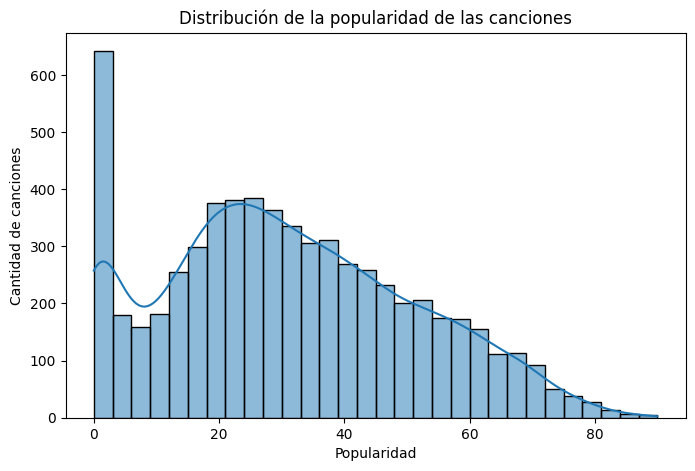

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True)

plt.title('Distribución de la popularidad de las canciones')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver en el diagrama que la mayoria de las canciones no tienen popularidad, tenemos una grafica sesgada a la izquierda, muy pocas canciones se hacen populares.

7. Crea un boxplot de la duración (duration_ms). ¿Hay outliers?

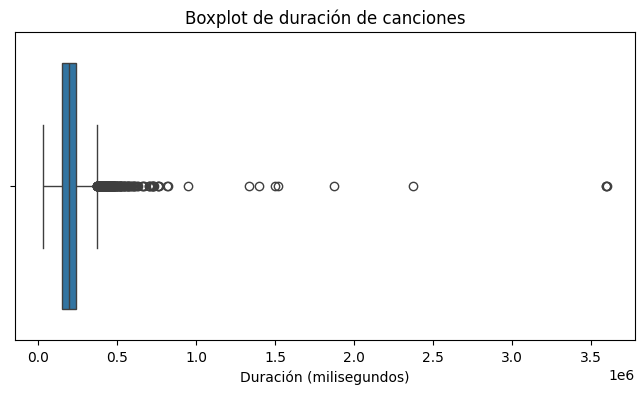

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])

plt.title('Boxplot de duración de canciones')
plt.xlabel('Duración (milisegundos)')
plt.show()

En este Boxplot vemos que la caja esta muy a la izquierda lo que nos habla de una duracion muy baja en las canciones, podriamos decir que la mayorio de las canciones esta entre 3×10^4 y 0.3×10\^6 milisegundos, es decir, entre 0.5 y 5 minutos.

Los valores atípicos son tan grandes, que aplastan el resto del gráfico hacia la izquierda. La caja parece muy pequeña, pero eso es solo porque el eje X tiene que cubrir hasta 3.6 millones de milisegundos.

Podemos hacer un Boxplot pero filtrando las canciones por su duración solo para ver los datos más de cerca.

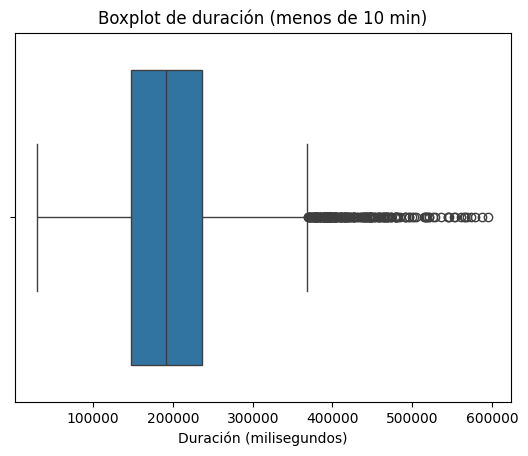

In [ ]:
# Filtrar canciones con duración < 10 minutos
df_filtrado = df[df['duration_ms'] < 600000]

sns.boxplot(x=df_filtrado['duration_ms'])
plt.title('Boxplot de duración (menos de 10 min)')
plt.xlabel('Duración (milisegundos)')
plt.show()

Podemos ver ahora que la media de las canciones es de alrededor de 1.9×10^5 milisegundos, algo como 3.1 minutos.

El primer cuartil esta en 1.5×10^5 milisegundos, unos 2.5 minutos.

El tercer cuartil esta en 2.2×10^5 milisegundos, unos 3.6 minutos.

8. ¿Cuál es el top 10 de géneros con más canciones? Haz un gráfico de barras.

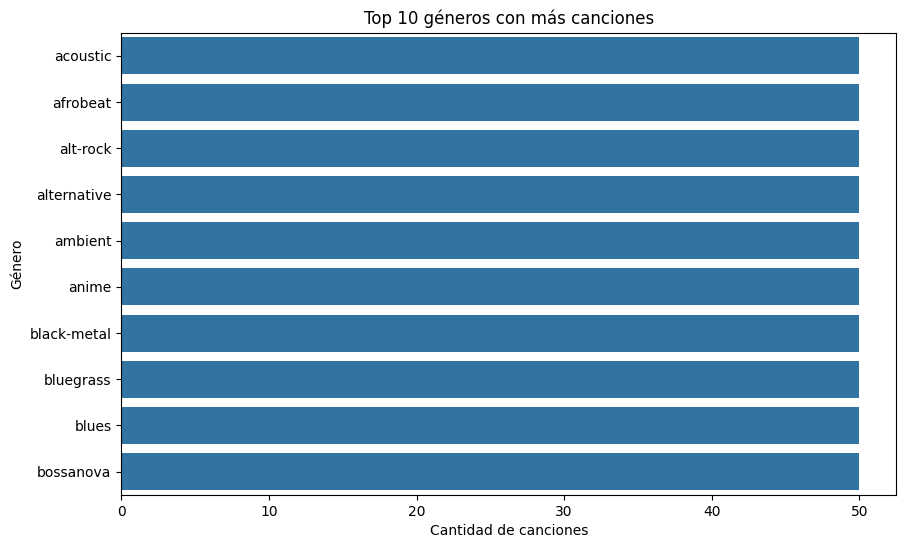

In [ ]:
top_generos = df['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_generos.values, y=top_generos.index)

plt.title('Top 10 géneros con más canciones')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Género')
plt.show()

In [ ]:
df['genre'].value_counts().head(60)

,count
genre,
acoustic,50
afrobeat,50
alt-rock,50
alternative,50
ambient,50
anime,50
black-metal,50
bluegrass,50
blues,50


Al parecer este dataset tiene una distribución equilibrada de canciones por genero, algo que puede ser común en dataset hechos para aprender, por lo que nuestra grafica de barras solo mostrara los primeros 10 generos ordenados alfabeticamente.

9. Haz un gráfico de barras comparando cuántas canciones explícitas hay por género.

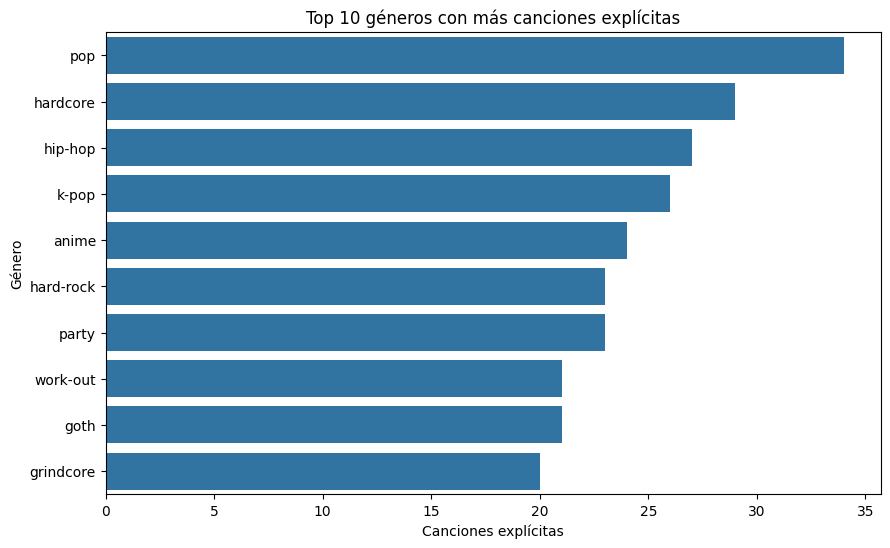

In [ ]:
expl_por_genero = df.groupby('genre')['explicit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=expl_por_genero.values, y=expl_por_genero.index)

plt.title('Top 10 géneros con más canciones explícitas')
plt.xlabel('Canciones explícitas')
plt.ylabel('Género')
plt.show()